<a href="https://colab.research.google.com/github/lijid/Projects/blob/Pulsar_star/Predicting_Pulsar_star.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

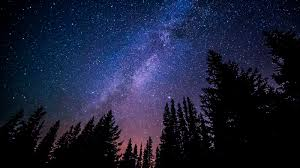

[Data set](https://www.kaggle.com/datasets/spacemod/pulsar-dataset)

In [184]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [185]:
# Load the dateset
df = pd.read_csv('/content/pulsar_star_dataset.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [186]:
# Data Exploration
df.shape          # gives the number of rows and columns

(17898, 9)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [188]:
df.dtypes         # gives the type of data

,0
Mean of the integrated profile,float64
Standard deviation of the integrated profile,float64
Excess kurtosis of the integrated profile,float64
Skewness of the integrated profile,float64
Mean of the DM-SNR curve,float64
Standard deviation of the DM-SNR curve,float64
Excess kurtosis of the DM-SNR curve,float64
Skewness of the DM-SNR curve,float64
target_class,int64


In [189]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [190]:
df.nunique()

,0
Mean of the integrated profile,8626
Standard deviation of the integrated profile,17862
Excess kurtosis of the integrated profile,17897
Skewness of the integrated profile,17898
Mean of the DM-SNR curve,9000
Standard deviation of the DM-SNR curve,17894
Excess kurtosis of the DM-SNR curve,17895
Skewness of the DM-SNR curve,17895
target_class,2


In [191]:
df['target_class'].value_counts()

,count
target_class,
0,16259
1,1639


In [192]:
# check for misssing data
df.isnull().sum()

,0
Mean of the integrated profile,0
Standard deviation of the integrated profile,0
Excess kurtosis of the integrated profile,0
Skewness of the integrated profile,0
Mean of the DM-SNR curve,0
Standard deviation of the DM-SNR curve,0
Excess kurtosis of the DM-SNR curve,0
Skewness of the DM-SNR curve,0
target_class,0


In [193]:
df.duplicated().sum()        # check for duplicates

0

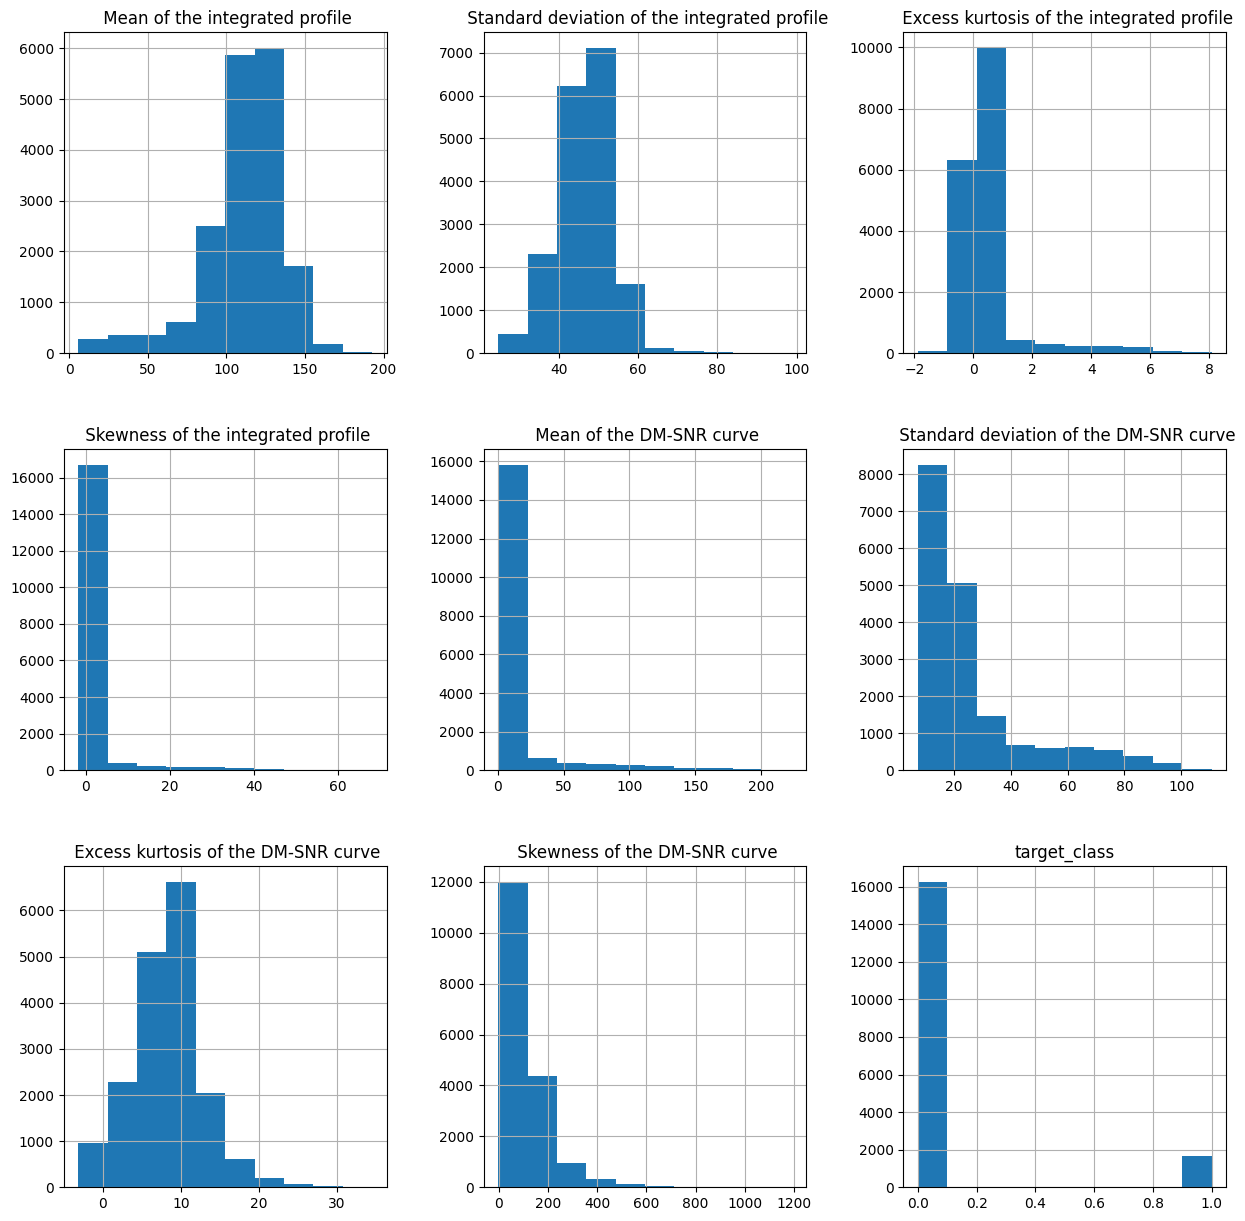

In [194]:
# show distribution of data
df.hist(figsize=(15,15))
plt.show()

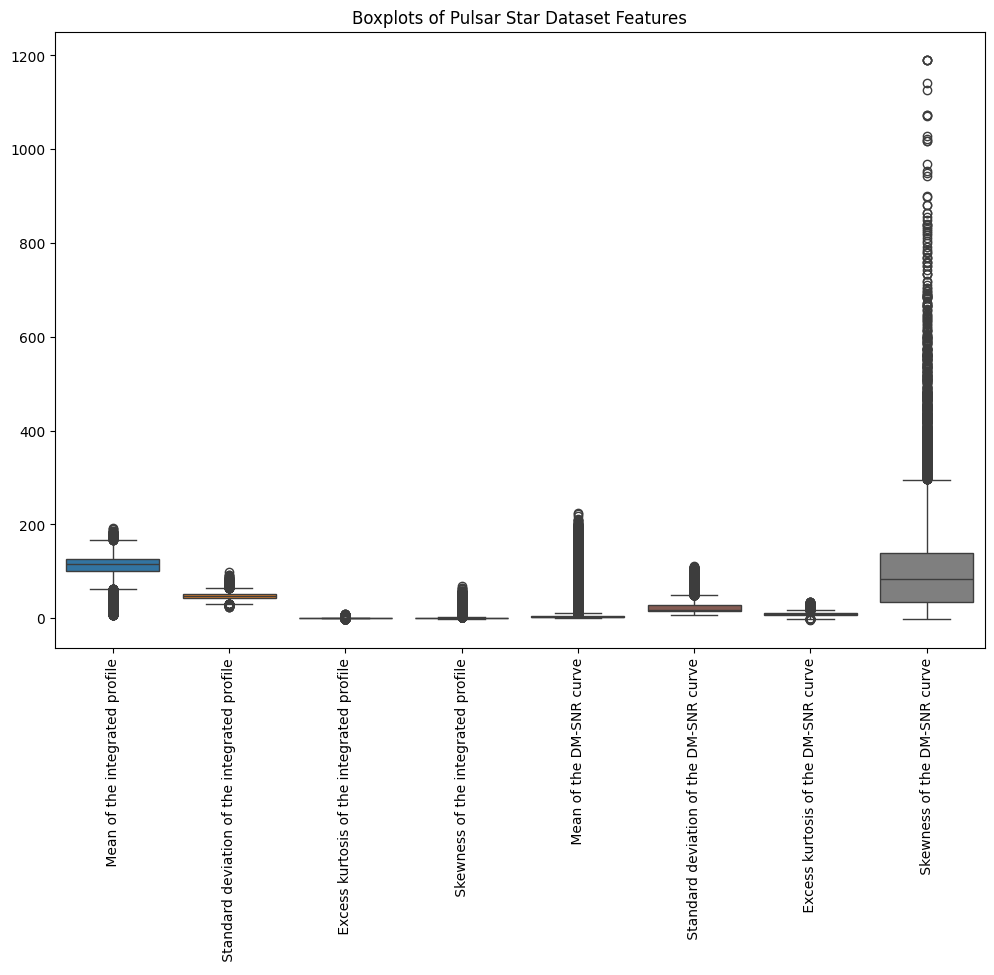

In [195]:
# Plot boxplots for each feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.iloc[:, :-1])  # Exclude the 'Class' column
plt.xticks(rotation=90)
plt.title('Boxplots of Pulsar Star Dataset Features')
plt.show()

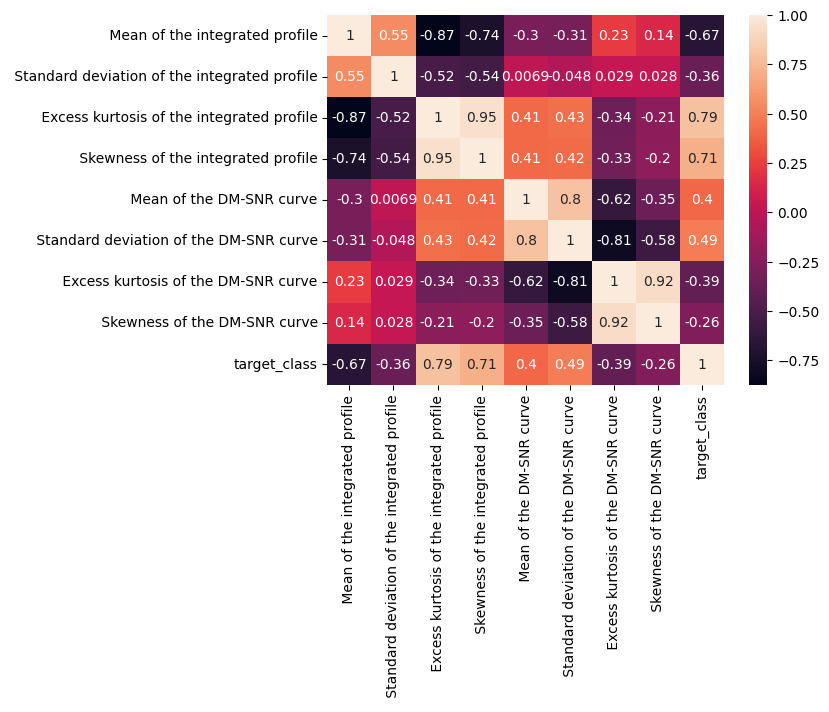

In [196]:
#corelational analysis
sns.heatmap(df.corr(), annot=True)
plt.show()

In [197]:
# Check for outliers

# Calculate the IQR for each feature
Q1 = df.iloc[:, :-1].quantile(0.25)
Q3 = df.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

# Define outliers for each feature
outliers = ((df.iloc[:, :-1] < (Q1 - 1.5 * IQR)) | (df.iloc[:, :-1] > (Q3 + 1.5 * IQR))).sum()

print("Number of outliers in each feature:")
print(outliers)

Number of outliers in each feature:
 Mean of the integrated profile                  1030
 Standard deviation of the integrated profile     262
 Excess kurtosis of the integrated profile       1596
 Skewness of the integrated profile              1901
 Mean of the DM-SNR curve                        2927
 Standard deviation of the DM-SNR curve          2346
 Excess kurtosis of the DM-SNR curve              487
 Skewness of the DM-SNR curve                     901
dtype: int64


In [198]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [199]:
# List of features to process outliers
features_to_process = [
    " Mean of the integrated profile", " Standard deviation of the integrated profile", " Excess kurtosis of the integrated profile", " Skewness of the integrated profile",
" Mean of the DM-SNR curve"," Standard deviation of the DM-SNR curve"," Excess kurtosis of the DM-SNR curve"," Skewness of the DM-SNR curve"]

# Apply capping and flooring for selected features
for column in features_to_process:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    cap = Q3 + 1.5 * IQR
    floor = Q1 - 1.5 * IQR
    df[column] = df[column].clip(lower=floor, upper=cap)

# Check the result
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,112.482306,46.496346,0.286734,0.514471,4.259127,23.534540,8.219893,97.907679,0.091574
std,21.470897,6.594733,0.384464,0.981019,3.352427,12.623150,4.248335,80.720888,0.288432
min,61.695312,29.405241,-0.642242,-1.791886,0.213211,7.370432,-1.600675,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,166.320312,63.993979,1.142666,2.602315,10.776024,49.414263,18.085140,295.832570,1.000000


In [200]:
# Recalculate IQR and outliers ranges
Q1_new = df.iloc[:, :-1].quantile(0.25)
Q3_new= df.iloc[:, :-1].quantile(0.75)
IQR_new = Q3_new - Q1_new

# Define new caps and floors
caps_new = Q3_new + 1.5 * IQR_new
floors_new = Q1_new - 1.5 * IQR_new

# Function to check for outliers
def find_outliers(df, floors, caps):
    outliers = {}
    for column in df.columns:
        if column != 'target_class':  # Exclude the target variable
            lower_bound = floors[column]
            upper_bound = caps[column]
            outliers[column] = {
                'below_floor': df[df[column] < lower_bound].shape[0],
                'above_cap': df[df[column] > upper_bound].shape[0]
            }
    return outliers

# Identify remaining outliers
outliers = find_outliers(df, floors_new, caps_new)
print("Remaining outliers:\n", outliers)

Remaining outliers:
 {' Mean of the integrated profile': {'below_floor': 0, 'above_cap': 0}, ' Standard deviation of the integrated profile': {'below_floor': 0, 'above_cap': 0}, ' Excess kurtosis of the integrated profile': {'below_floor': 0, 'above_cap': 0}, ' Skewness of the integrated profile': {'below_floor': 0, 'above_cap': 0}, ' Mean of the DM-SNR curve': {'below_floor': 0, 'above_cap': 0}, ' Standard deviation of the DM-SNR curve': {'below_floor': 0, 'above_cap': 0}, ' Excess kurtosis of the DM-SNR curve': {'below_floor': 0, 'above_cap': 0}, ' Skewness of the DM-SNR curve': {'below_floor': 0, 'above_cap': 0}}


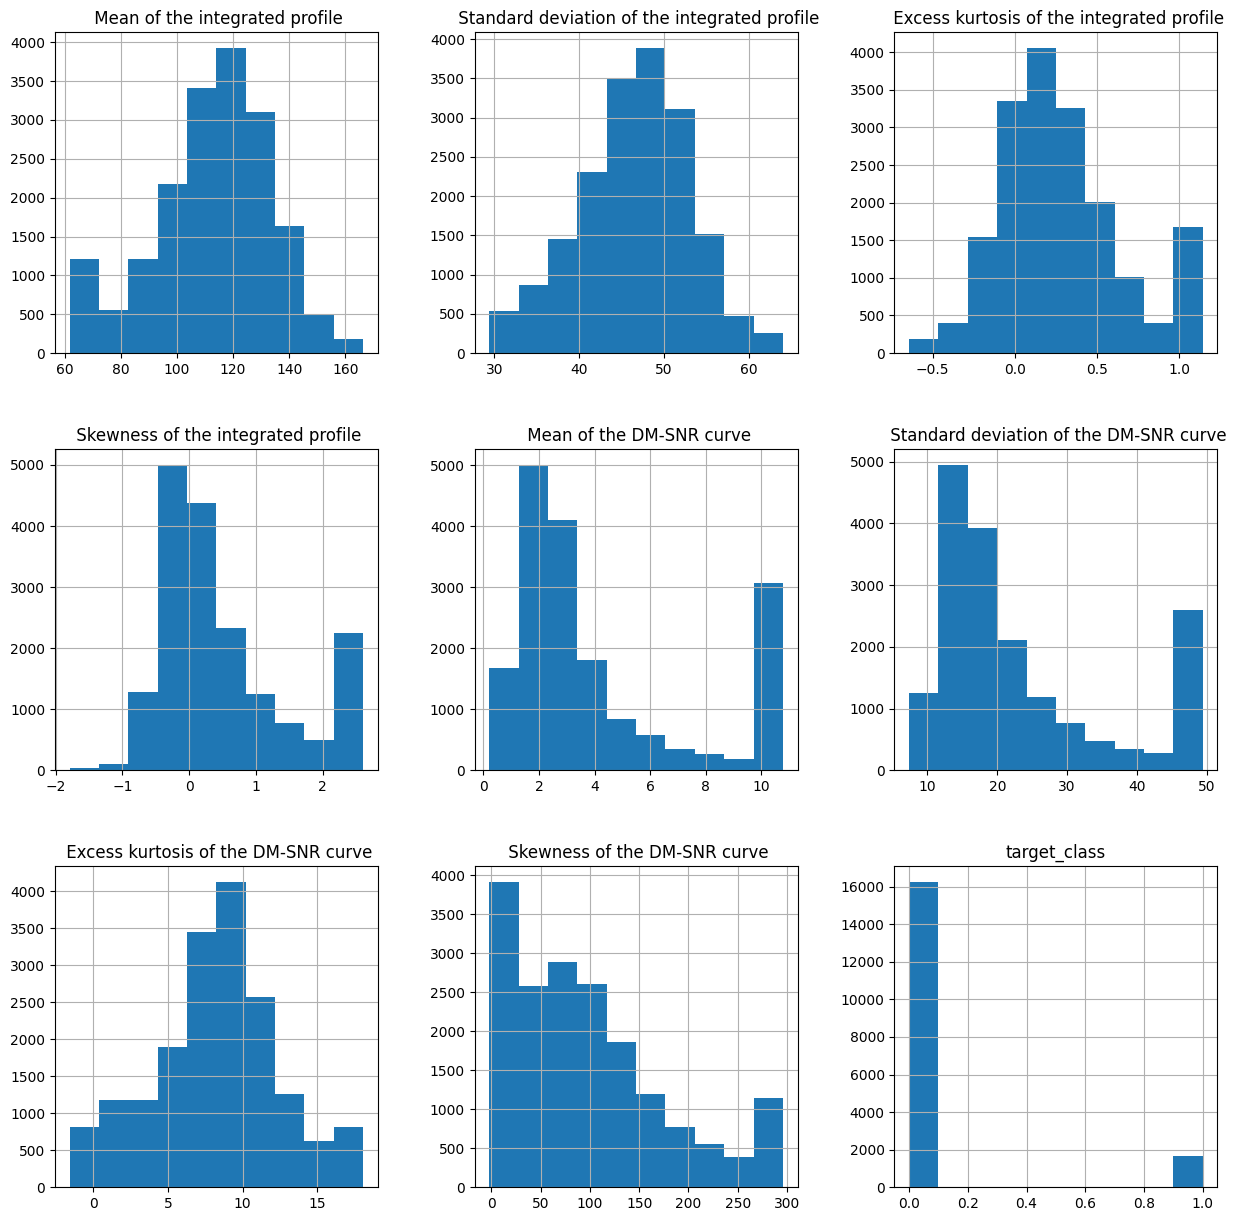

In [201]:
# show the distribution of data
df.hist(figsize=(15,15))
plt.show()

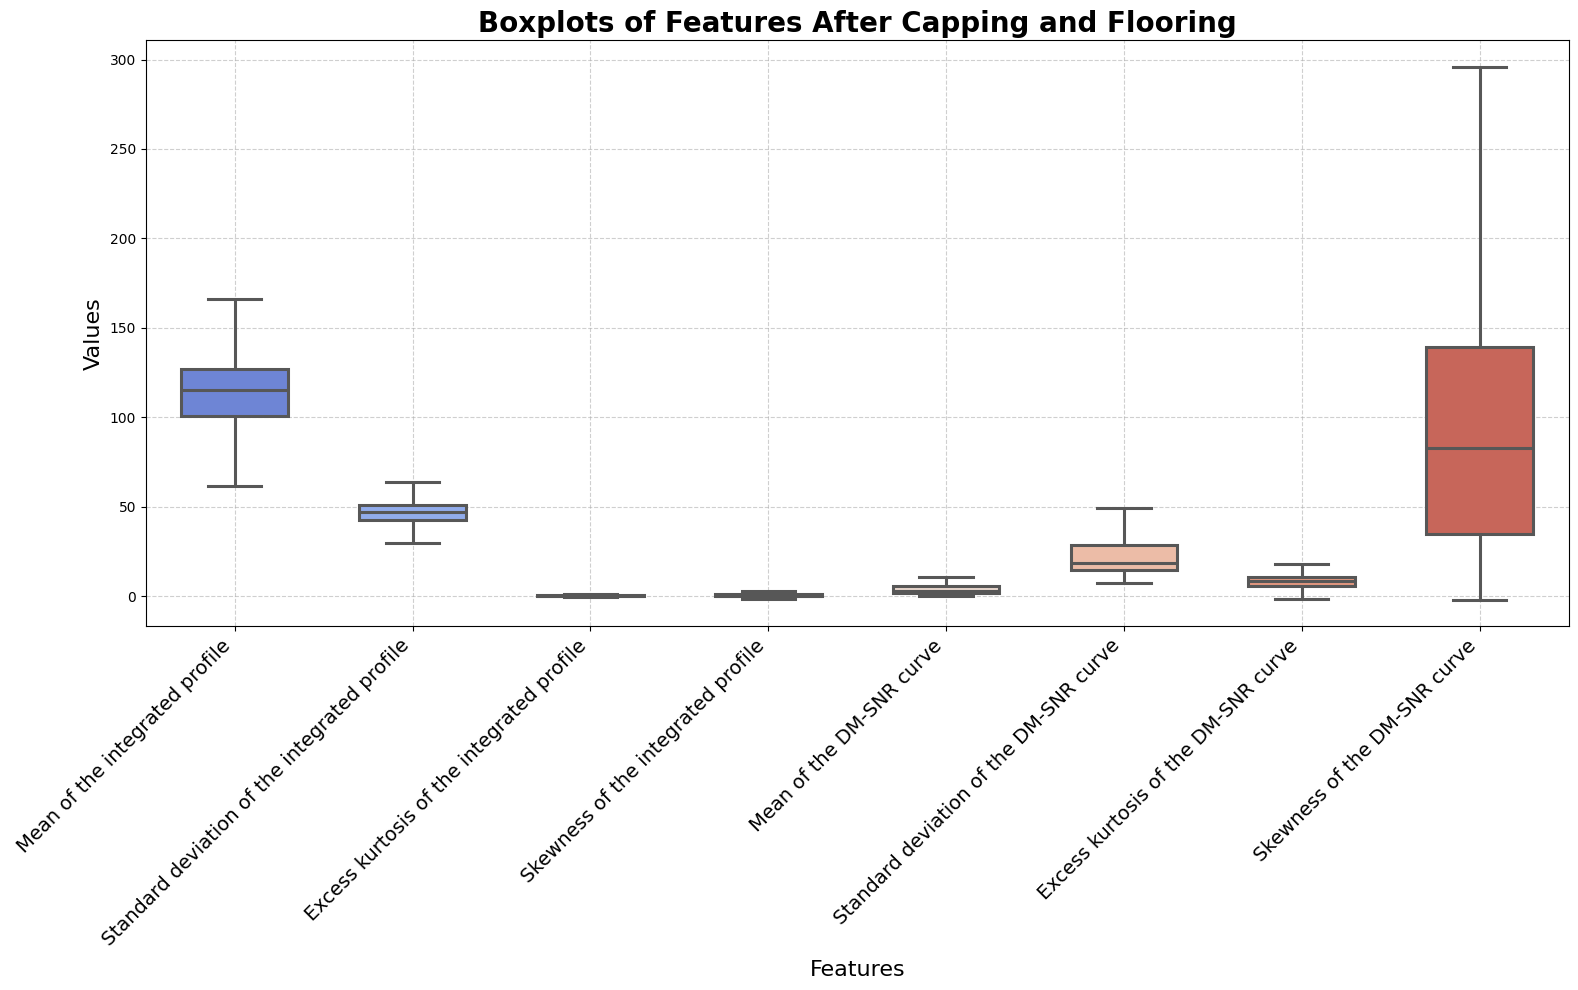

In [202]:
# Plot boxplots for features to visualize outliers
plt.figure(figsize=(16, 10))
sns.boxplot(data=df.iloc[:, :-1], palette="coolwarm", width=0.6, linewidth=2.2)
plt.title('Boxplots of Features After Capping and Flooring', fontsize=20, weight='bold')
plt.xlabel('Features', fontsize=16)
plt.ylabel('Values', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

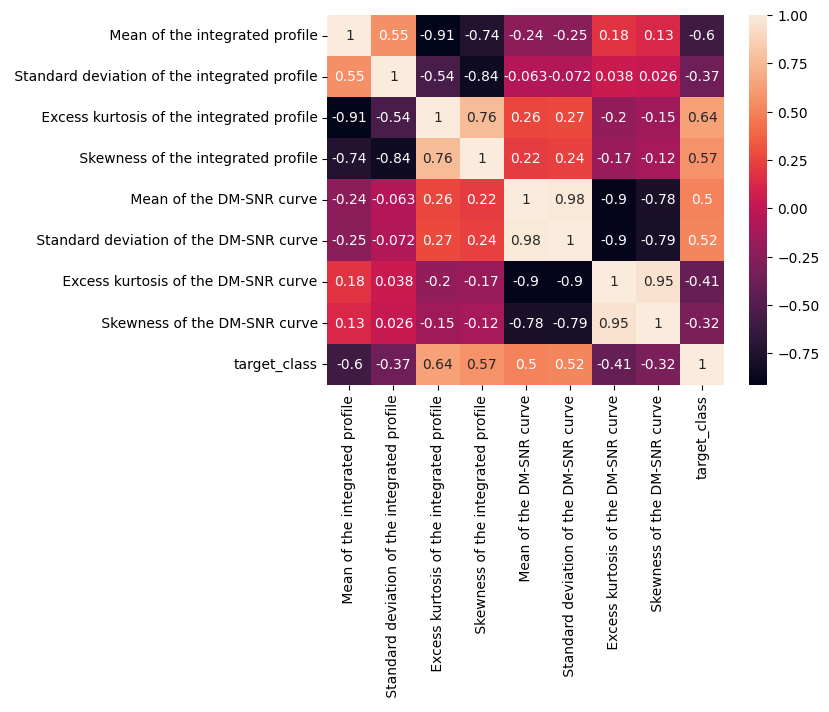

In [203]:
# corelational analysis
sns.heatmap(df.corr(), annot=True)
plt.show()

In [204]:
# Machine Learning

X = df.drop('target_class', axis=1)  # separate features and target
y = df['target_class']

In [177]:
# split to train and test data set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(14318, 8) (3580, 8) (14318,) (3580,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3232
           1       0.87      0.80      0.84       348

    accuracy                           0.97      3580
   macro avg       0.93      0.90      0.91      3580
weighted avg       0.97      0.97      0.97      3580

[[3191   41]
 [  68  280]]


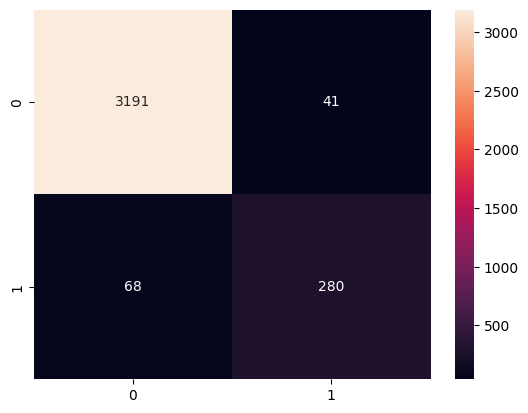

In [206]:
# Logistic algorithm
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3232
           1       0.88      0.75      0.81       348

    accuracy                           0.97      3580
   macro avg       0.93      0.87      0.89      3580
weighted avg       0.96      0.97      0.96      3580

[[3197   35]
 [  88  260]]


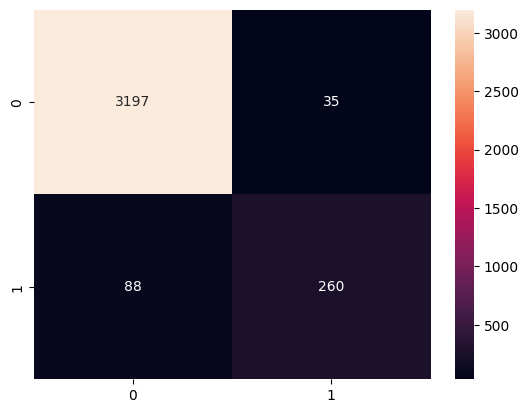

In [207]:
#K-Nearest neighbor
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3232
           1       0.91      0.82      0.86       348

    accuracy                           0.97      3580
   macro avg       0.94      0.91      0.92      3580
weighted avg       0.97      0.97      0.97      3580

[[3202   30]
 [  61  287]]


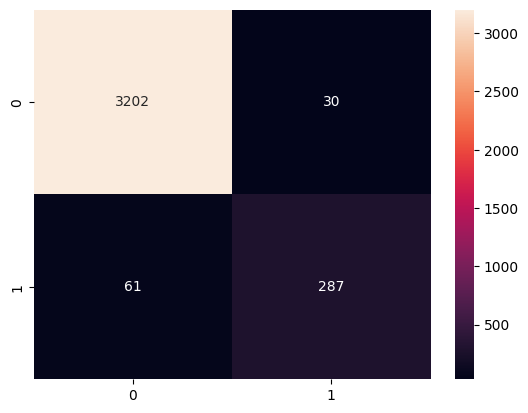

In [208]:
# random forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))


# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [209]:
# Scale the features for SVM algorithm

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3232
           1       0.90      0.80      0.85       348

    accuracy                           0.97      3580
   macro avg       0.94      0.90      0.92      3580
weighted avg       0.97      0.97      0.97      3580

[[3201   31]
 [  69  279]]


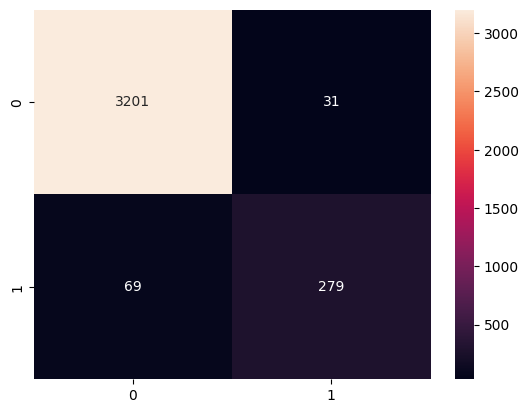

In [210]:
#SVM algorithm
svm_model = SVC(kernel='rbf',random_state = 42 )
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()


In [211]:
import joblib

# Save the model to a file
joblib.dump(svm_model, 'svm_model.pkl')

# To load the model later
# loaded_model = joblib.load('svm_model.pkl')

['svm_model.pkl']